# Prediction using Supervised ML

In [3]:
#importing required libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Reading Data
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
print("Data Imported Successfully")
data.head(5)

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Visualizing Data**

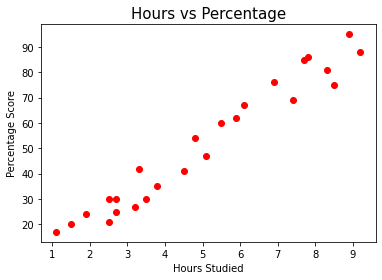

In [21]:
# Plotting the distribution of scores
plt.title('Hours vs Percentage', fontsize=15)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.scatter(data.Hours,data.Scores,color='red')
plt.show()

From the above **SCATTER PLOT** , it indicates there is a positive linear relation between the number of hours studied and percentage of score.

In [18]:
#Preparing Data
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values


**Splitting into train and test sets**

In [19]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

**Training the model.**

In [20]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

##Fitting Training Data
linreg.fit(x_train,y_train)
print("Training our model is finished")

Training our model is finished


In [22]:
#Plotting the REGRESSION LINE
rline = linreg.intercept_ + linreg.coef_*x_train

**Plotting Train Data**

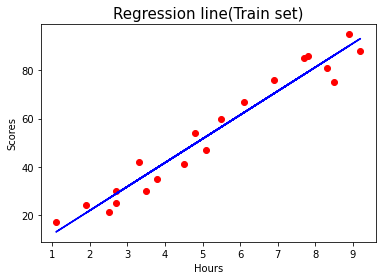

In [23]:
plt.title("Regression line(Train set)",fontsize=15)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,rline,color='blue')
plt.show()

In [27]:
#Predicting the Scores for test data
y_pred=linreg.predict(x_test) 
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [28]:
print(y_test)

[20 27 69 30 62]


**Plotting Test Data**

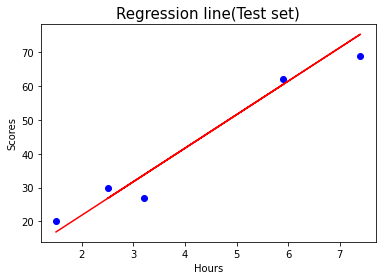

In [34]:
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression line(Test set)",fontsize=15)
plt.plot(x_test,y_pred,color='red')
plt.scatter(x_test,y_test,color='blue')
plt.show()

**Comparing Actual Score vs Predicted Score**

In [31]:
actual = list(y_test)
pred=list(y_pred)
compare = pd.DataFrame({ 'Actual':actual,'Result':pred})
compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Errors**

In [37]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Squared Error      = ",mse)
print("Root Mean Squared Error = ",rmse)
print("Mean Absolute Error     = ",mae)

Mean Squared Error      =  21.598769307217456
Root Mean Squared Error =  4.647447612100373
Mean Absolute Error     =  4.183859899002982


**Predicting Score**

In [43]:
hours = 9.25
prediction_score = linreg.predict([[hours]])
print("Predicted score for a student studying", hours ,"hours :",prediction_score)

Predicted score for a student studying 9.25 hours : [93.69173249]
